####import목록

In [24]:
#https://github.com/lsjsj92/keras_basic/blob/master/7.%20predict_multi_img_with_CNN.ipynb 참고링크

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
import glob

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix

import seaborn as sns

###파일불러오기

In [25]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab Notebooks/data/train'

categories = ['adidas','converse','nike']
nb_class=len(categories)

image_w = 240
image_h = 240
pixels = image_w * image_h * 3

x = []
y = []
#one-hot 돌리기
for idx, categ in enumerate(categories):
    label = [0 for i in range(nb_class)]
    label[idx] = 1
    image_dir = data_dir+"/"+ categ
    files = glob.glob(image_dir+"/*.jpg")
    print(categ, " 파일 길이 : ", len(files)) #다 237

    for i, f in enumerate(files):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_w,image_h))
      data = np.asarray(img)
      x.append(data)
      y.append(label)

      if i % 700 == 0:
            print(categ, " : ", f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
adidas  파일 길이 :  237
adidas  :  /content/drive/MyDrive/Colab Notebooks/data/train/adidas/133.jpg
converse  파일 길이 :  237
converse  :  /content/drive/MyDrive/Colab Notebooks/data/train/converse/90.jpg
nike  파일 길이 :  237
nike  :  /content/drive/MyDrive/Colab Notebooks/data/train/nike/172.jpg


####이제 numpy데이터를 만들어서 학습시킨다

In [26]:
x = np.array(x)
x.shape
y = np.array(y)
y.shape
#1 0 0  이면 adidas
#0 1 0 이면 converse 이런식


X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.2)
xy = (X_train, X_test, Y_train, Y_test)
np.save("/content/drive/MyDrive/Colab Notebooks/data/data_sh.npy", xy)
print(xy)
print("ok", len(y))


X_train, X_test, Y_train,Y_test = np.load("/content/drive/MyDrive/Colab Notebooks/data/data_sh.npy",allow_pickle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train =  X_train.astype('float32')/255
X_test =  X_test.astype('float32')/255

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


(array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
       

####학습

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())#벡터 1차원으로변경
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#손실함수'categorical_crossentropy'


modelpath = './drive/MyDrive/Colab Notebooks/data/'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 50, batch_size = 50, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, Y_test)[1]))



y_vloss = history.history['val_loss']
y_loss = history.history['loss']



Epoch 1: val_loss improved from inf to 1.09556, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 2: val_loss did not improve from 1.09556

Epoch 3: val_loss did not improve from 1.09556

Epoch 4: val_loss did not improve from 1.09556

Epoch 5: val_loss improved from 1.09556 to 1.09083, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 6: val_loss improved from 1.09083 to 1.08443, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 7: val_loss improved from 1.08443 to 1.05376, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 8: val_loss improved from 1.05376 to 1.02931, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 9: val_loss improved from 1.02931 to 1.01092, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 10: val_loss improved from 1.01092 to 0.99454, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 11: val_loss did not improve from 0.99454

Epoch 12: val_loss improved from 0.99454 to 0.98644, saving model to ./drive/MyDrive/Colab Notebooks/data/



Epoch 13: val_loss did not improve from 0.98644

Epoch 14: val_loss did not improve from 0.98644

Epoch 15: val_loss did not improve from 0.98644

Epoch 16: val_loss did not improve from 0.98644

Epoch 17: val_loss did not improve from 0.98644

Epoch 18: val_loss did not improve from 0.98644

Epoch 19: val_loss did not improve from 0.98644

Epoch 20: val_loss did not improve from 0.98644

Epoch 21: val_loss did not improve from 0.98644

Epoch 22: val_loss did not improve from 0.98644
5/5 [==============================] - 0s 30ms/step - loss: 1.3332 - accuracy: 0.5455

 Test accuracy: 0.5454545617103577.


####그래프 구현

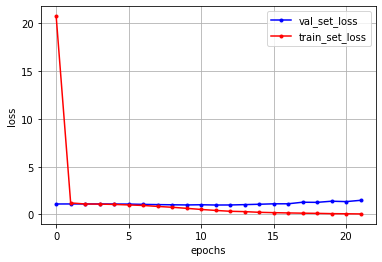

In [34]:
#정확도가 절반 정도.... 찍는것보단 낫다
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='blue', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='red', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

####히트맵 그리기

In [35]:
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()